In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2/2 [==============================] - 9s 4s/step


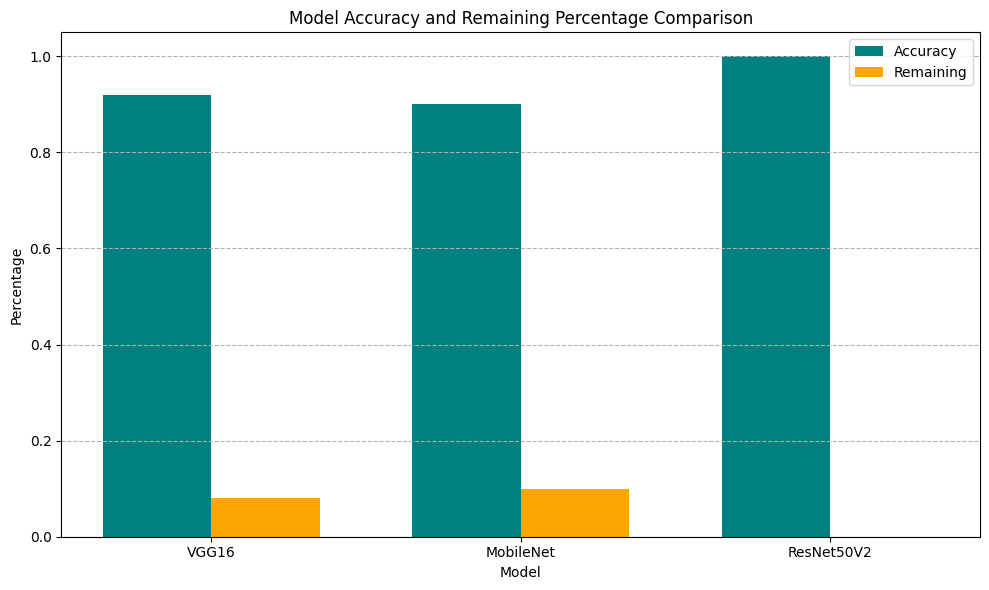

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import accuracy_score

# Set up paths and parameters
test_dir = '/content/drive/MyDrive/fTest'
image_size = (224, 224)  # Adjust to 224x224 based on the trained model

# Define the models and their paths
models = {
    'VGG16': '/content/drive/MyDrive/Dataset/VGG16.h5',
    'MobileNet': '/content/drive/MyDrive/Dataset/mobilenetv2_final.h5',
    'ResNet50V2': '/content/drive/MyDrive/Dataset/ResNet50V2.h5'
}

# Define class labels
class_labels = ['Chhattisgrah', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karanataka', 'Kerala',
                'Maharashtra', 'Manipur', 'Mizoram', 'West_Bengal']

# Create a mapping from class name to index
class_dict = {label.lower().replace(' ', '_'): idx for idx, label in enumerate(class_labels)}

# Load and preprocess test images
test_images = []
test_labels = []

for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    if os.path.isdir(img_path):
        continue

    img = load_img(img_path, target_size=image_size)
    img = img_to_array(img)
    img = preprocess_input(img)
    test_images.append(img)

    label = img_name.rsplit('_', 1)[0].lower().replace(' ', '_')
    if label in class_dict:
        test_labels.append(class_dict[label])
    else:
        print(f"Warning: '{label}' extracted from '{img_name}' is not in class_labels")

# Convert to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Collect accuracy data for each model
model_accuracies = []

for model_name, model_path in models.items():
    model = load_model(model_path)
    predictions = model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_labels

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(y_true, y_pred)
    model_accuracies.append((model_name, overall_accuracy))

# Create a DataFrame for visualization
data = {
    'Model': [ma[0] for ma in model_accuracies],
    'Accuracy': [ma[1] for ma in model_accuracies],
    'Remaining': [1 - ma[1] for ma in model_accuracies]
}

df = pd.DataFrame(data)

# Plot the comparison graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar graph
bar_width = 0.35
bar_positions = np.arange(len(df))

ax.bar(bar_positions - bar_width/2, df['Accuracy'], bar_width, label='Accuracy', color='teal')
ax.bar(bar_positions + bar_width/2, df['Remaining'], bar_width, label='Remaining', color='orange')

# Set the labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Percentage')
ax.set_title('Model Accuracy and Remaining Percentage Comparison')
ax.set_xticks(bar_positions)
ax.set_xticklabels(df['Model'])
ax.legend()

# Display the grid
ax.grid(axis='y', linestyle='--')

# Save the plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Dataset/model_comparison.png')
plt.show()

2/2 [==============================] - 13s 3s/step


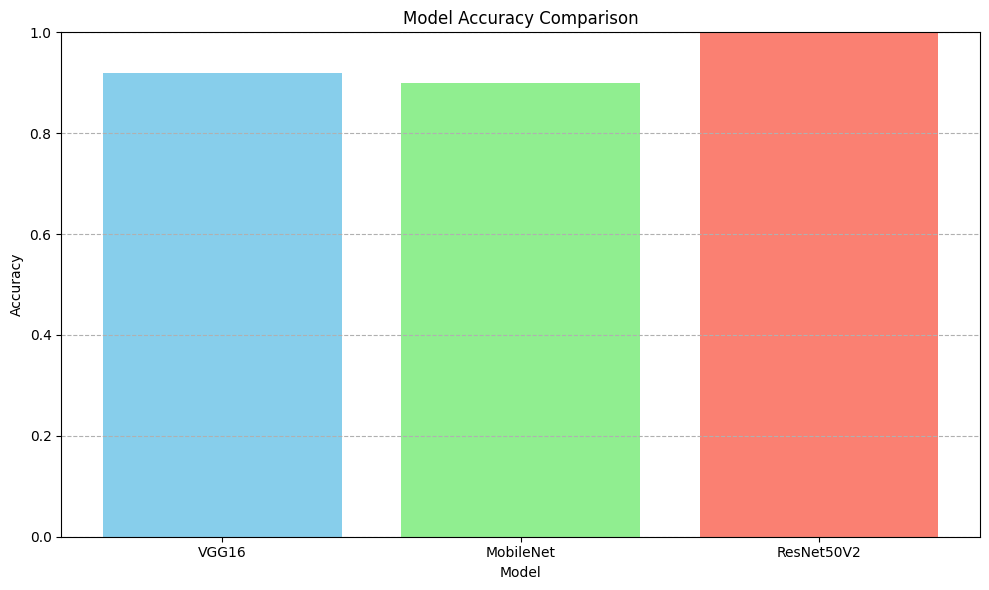

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import accuracy_score

# Set up paths and parameters
test_dir = '/content/drive/MyDrive/fTest'
image_size = (224, 224)  # Adjust to 224x224 based on the trained model

# Define the models and their paths
models = {
    'VGG16': '/content/drive/MyDrive/Dataset/VGG16.h5',
    'MobileNet': '/content/drive/MyDrive/Dataset/mobilenetv2_final.h5',
    'ResNet50V2': '/content/drive/MyDrive/Dataset/ResNet50V2.h5'
}

# Define class labels
class_labels = ['Chhattisgrah', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karanataka', 'Kerala',
                'Maharashtra', 'Manipur', 'Mizoram', 'West_Bengal']

# Create a mapping from class name to index
class_dict = {label.lower().replace(' ', '_'): idx for idx, label in enumerate(class_labels)}

# Load and preprocess test images
test_images = []
test_labels = []

for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    if os.path.isdir(img_path):
        continue

    img = load_img(img_path, target_size=image_size)
    img = img_to_array(img)
    img = preprocess_input(img)
    test_images.append(img)

    label = img_name.rsplit('_', 1)[0].lower().replace(' ', '_')
    if label in class_dict:
        test_labels.append(class_dict[label])
    else:
        print(f"Warning: '{label}' extracted from '{img_name}' is not in class_labels")

# Convert to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Collect accuracy data for each model
model_accuracies = []

for model_name, model_path in models.items():
    model = load_model(model_path)
    predictions = model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_labels

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(y_true, y_pred)
    model_accuracies.append((model_name, overall_accuracy))

# Create a DataFrame for visualization
data = {
    'Model': [ma[0] for ma in model_accuracies],
    'Accuracy': [ma[1] for ma in model_accuracies]
}

df = pd.DataFrame(data)

# Plot the bar graph for accuracy
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Accuracy'], color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 to represent percentages
plt.grid(axis='y', linestyle='--')

# Save the plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Dataset/model_accuracy_comparison.png')
plt.show()

2/2 [==============================] - 15s 7s/step


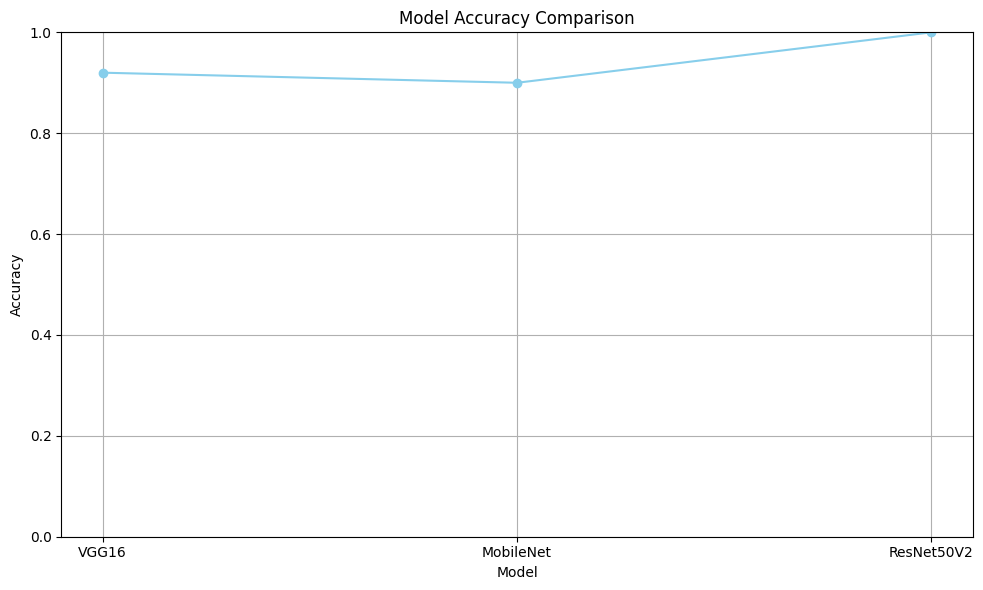

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import accuracy_score

# Set up paths and parameters
test_dir = '/content/drive/MyDrive/fTest'
image_size = (224, 224)  # Adjust to 224x224 based on the trained model

# Define the models and their paths
models = {
     'VGG16': '/content/drive/MyDrive/Dataset/VGG16.h5',
    'MobileNet': '/content/drive/MyDrive/Dataset/mobilenetv2_final.h5',
    'ResNet50V2': '/content/drive/MyDrive/Dataset/ResNet50V2.h5'
}

# Define class labels
class_labels = ['Chhattisgrah', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karanataka', 'Kerala',
                'Maharashtra', 'Manipur', 'Mizoram', 'West_Bengal']

# Create a mapping from class name to index
class_dict = {label.lower().replace(' ', '_'): idx for idx, label in enumerate(class_labels)}

# Load and preprocess test images
test_images = []
test_labels = []

for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    if os.path.isdir(img_path):
        continue

    img = load_img(img_path, target_size=image_size)
    img = img_to_array(img)
    img = preprocess_input(img)
    test_images.append(img)

    label = img_name.rsplit('_', 1)[0].lower().replace(' ', '_')
    if label in class_dict:
        test_labels.append(class_dict[label])
    else:
        print(f"Warning: '{label}' extracted from '{img_name}' is not in class_labels")

# Convert to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Collect accuracy data for each model
model_accuracies = []

for model_name, model_path in models.items():
    model = load_model(model_path)
    predictions = model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_labels

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(y_true, y_pred)
    model_accuracies.append((model_name, overall_accuracy))

# Create a DataFrame for visualization
data = {
    'Model': [ma[0] for ma in model_accuracies],
    'Accuracy': [ma[1] for ma in model_accuracies]
}

df = pd.DataFrame(data)

# Plot the line graph for accuracy
plt.figure(figsize=(10, 6))
plt.plot(df['Model'], df['Accuracy'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 to represent percentages
plt.grid(True)

# Save the plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Dataset/model_accuracy_comparison_line.png')
plt.show()


2/2 [==============================] - 12s 3s/step


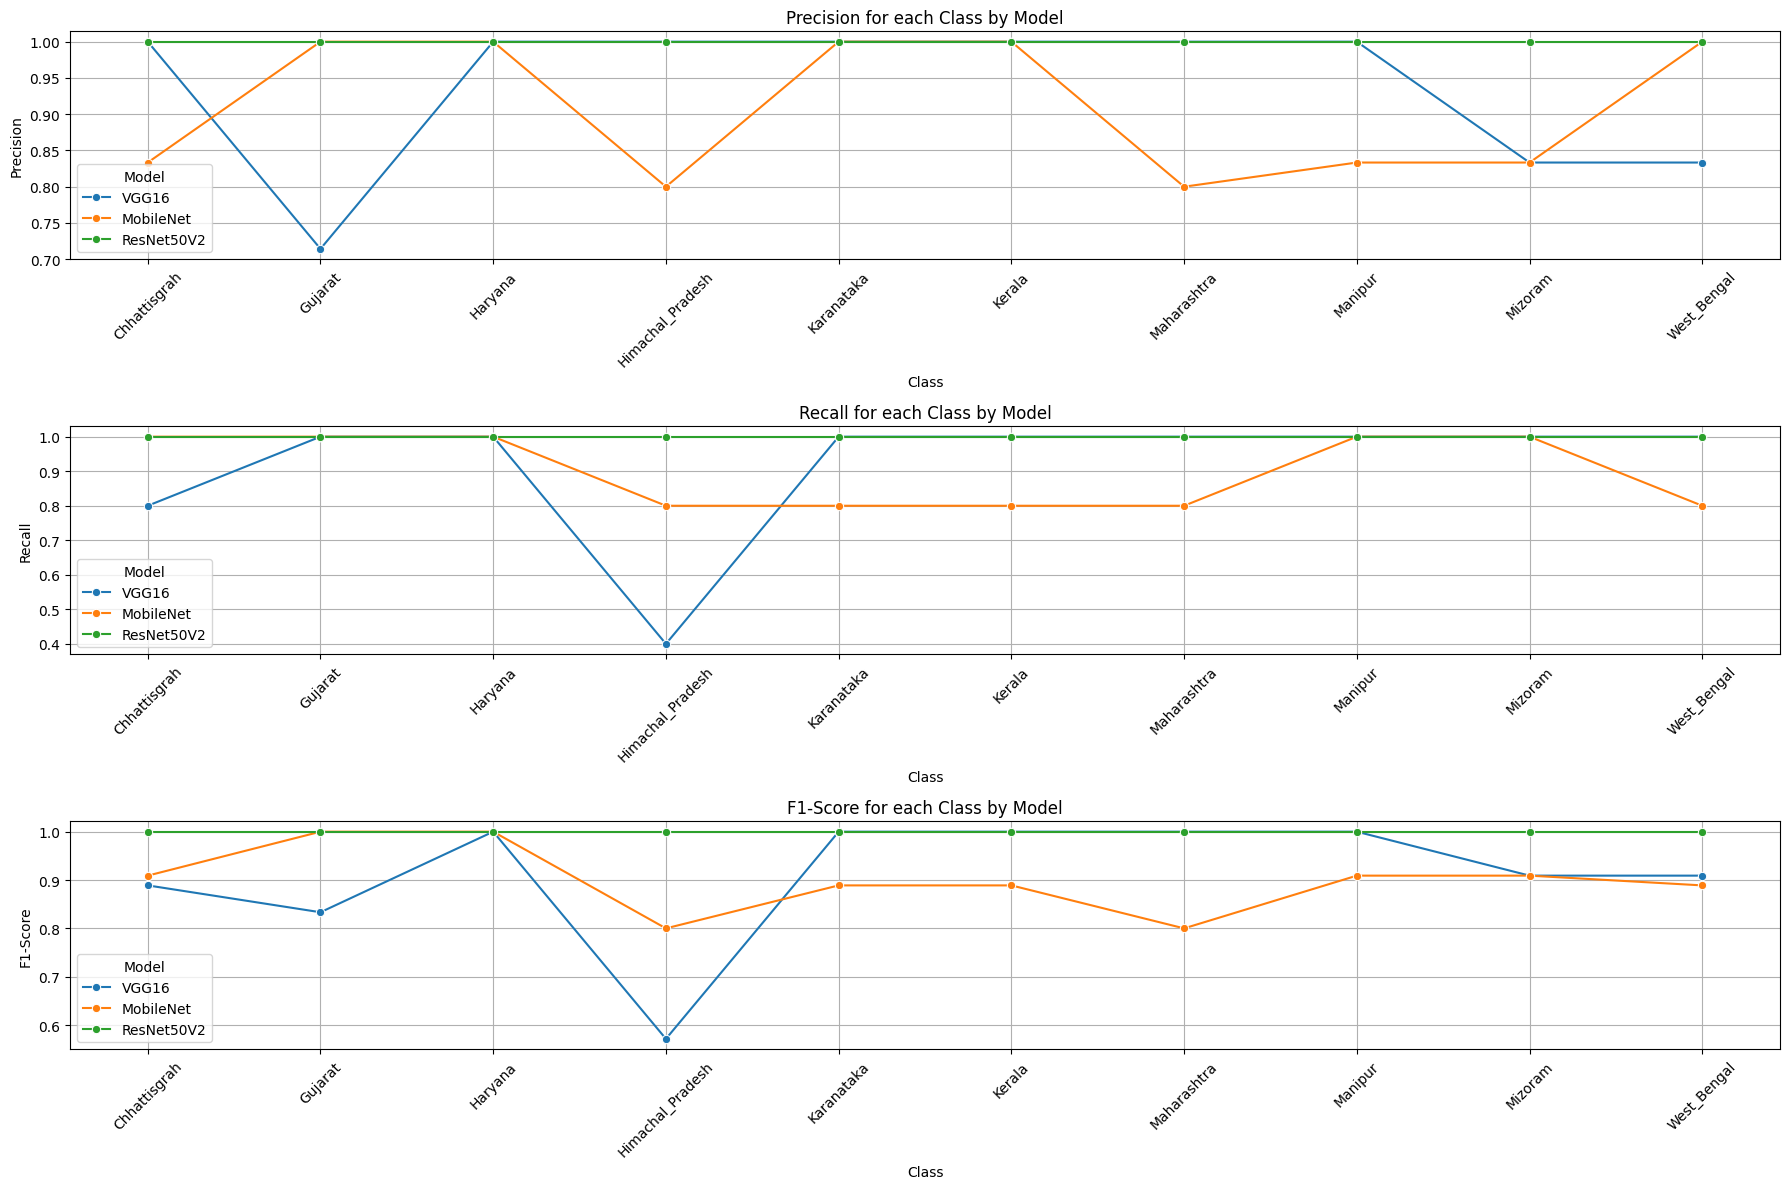

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set up paths and parameters
test_dir = '/content/drive/MyDrive/fTest'
image_size = (224, 224)  # Adjust to 224x224 based on the trained model

# Define the models and their paths
models = {
     'VGG16': '/content/drive/MyDrive/Dataset/VGG16.h5',
    'MobileNet': '/content/drive/MyDrive/Dataset/mobilenetv2_final.h5',
    'ResNet50V2': '/content/drive/MyDrive/Dataset/ResNet50V2.h5'
}

# Define class labels
class_labels = ['Chhattisgrah', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karanataka', 'Kerala',
                'Maharashtra', 'Manipur', 'Mizoram', 'West_Bengal']

# Create a mapping from class name to index
class_dict = {label.lower().replace(' ', '_'): idx for idx, label in enumerate(class_labels)}

# Load and preprocess test images
test_images = []
test_labels = []

for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    if os.path.isdir(img_path):
        continue

    img = load_img(img_path, target_size=image_size)
    img = img_to_array(img)
    img = preprocess_input(img)
    test_images.append(img)

    label = img_name.rsplit('_', 1)[0].lower().replace(' ', '_')
    if label in class_dict:
        test_labels.append(class_dict[label])
    else:
        print(f"Warning: '{label}' extracted from '{img_name}' is not in class_labels")

# Convert to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)
# Initialize dictionaries to store metrics for each model
model_reports = {}
model_accuracies = {}

for model_name, model_path in models.items():
    model = load_model(model_path)
    predictions = model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_labels

    # Calculate overall accuracy
    accuracy = accuracy_score(y_true, y_pred)
    model_accuracies[model_name] = accuracy

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
    model_reports[model_name] = report

# Create a DataFrame for visualization of precision, recall, and f1-score
precision_data = []
recall_data = []
f1_data = []

for model_name, report in model_reports.items():
    for class_label in class_labels:
        precision_data.append([model_name, class_label, report[class_label]['precision']])
        recall_data.append([model_name, class_label, report[class_label]['recall']])
        f1_data.append([model_name, class_label, report[class_label]['f1-score']])

df_precision = pd.DataFrame(precision_data, columns=['Model', 'Class', 'Precision'])
df_recall = pd.DataFrame(recall_data, columns=['Model', 'Class', 'Recall'])
df_f1 = pd.DataFrame(f1_data, columns=['Model', 'Class', 'F1-Score'])
import seaborn as sns

plt.figure(figsize=(18, 12))

# Precision
plt.subplot(3, 1, 1)
sns.lineplot(data=df_precision, x='Class', y='Precision', hue='Model', marker='o')
plt.title('Precision for each Class by Model')
plt.xticks(rotation=45)
plt.grid(True)

# Recall
plt.subplot(3, 1, 2)
sns.lineplot(data=df_recall, x='Class', y='Recall', hue='Model', marker='o')
plt.title('Recall for each Class by Model')
plt.xticks(rotation=45)
plt.grid(True)

# F1-Score
plt.subplot(3, 1, 3)
sns.lineplot(data=df_f1, x='Class', y='F1-Score', hue='Model', marker='o')
plt.title('F1-Score for each Class by Model')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


2/2 [==============================] - 9s 4s/step


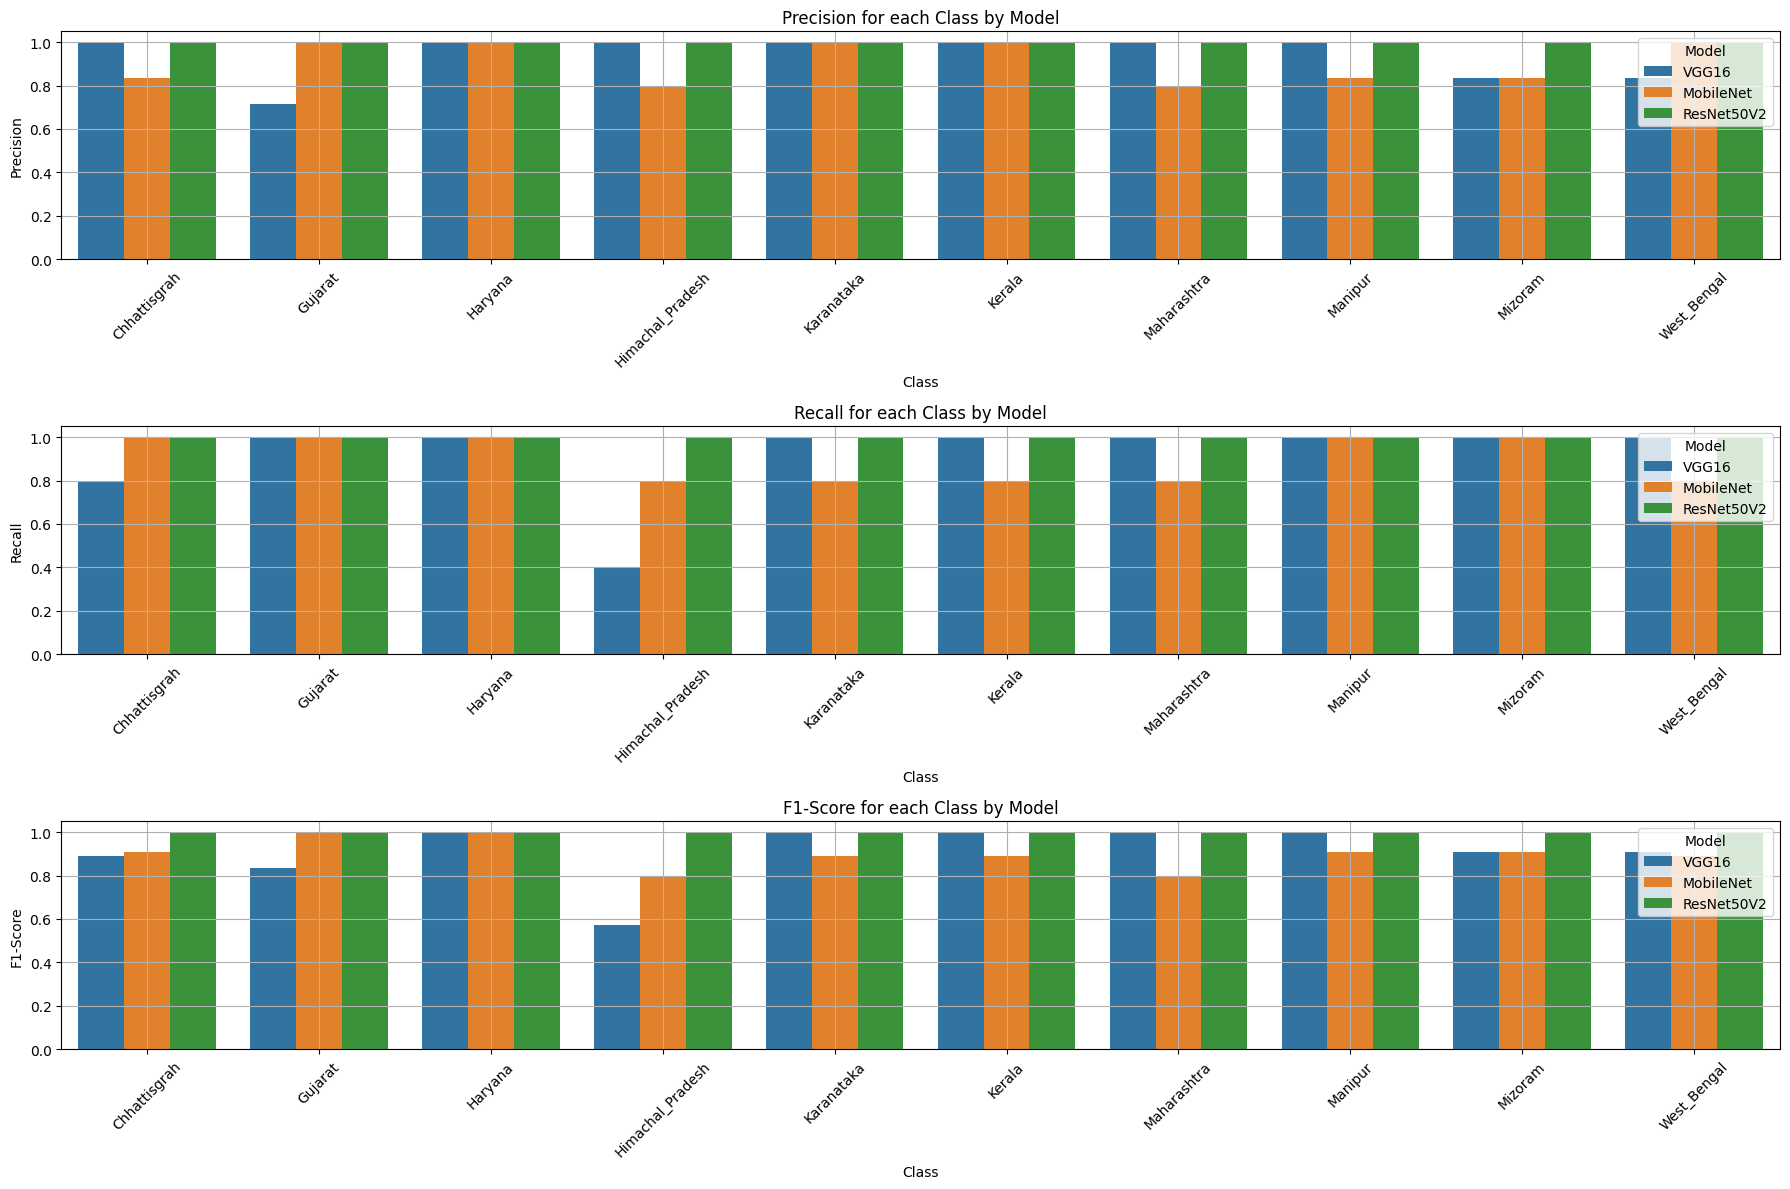

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import classification_report, accuracy_score

# Set up paths and parameters
test_dir = '/content/drive/MyDrive/fTest'
image_size = (224, 224)  # Adjust to 224x224 based on the trained model

# Define the models and their paths
models = {
       'VGG16': '/content/drive/MyDrive/Dataset/VGG16.h5',
    'MobileNet': '/content/drive/MyDrive/Dataset/mobilenetv2_final.h5',
    'ResNet50V2': '/content/drive/MyDrive/Dataset/ResNet50V2.h5'
}

# Define class labels
class_labels = ['Chhattisgrah', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karanataka', 'Kerala',
                'Maharashtra', 'Manipur', 'Mizoram', 'West_Bengal']

# Create a mapping from class name to index
class_dict = {label.lower().replace(' ', '_'): idx for idx, label in enumerate(class_labels)}

# Load and preprocess test images
test_images = []
test_labels = []

for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    if os.path.isdir(img_path):
        continue

    img = load_img(img_path, target_size=image_size)
    img = img_to_array(img)
    img = preprocess_input(img)
    test_images.append(img)

    label = img_name.rsplit('_', 1)[0].lower().replace(' ', '_')
    if label in class_dict:
        test_labels.append(class_dict[label])
    else:
        print(f"Warning: '{label}' extracted from '{img_name}' is not in class_labels")

# Convert to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Initialize dictionaries to store metrics for each model
model_reports = {}
model_accuracies = {}

for model_name, model_path in models.items():
    model = load_model(model_path)
    predictions = model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_labels

    # Calculate overall accuracy
    accuracy = accuracy_score(y_true, y_pred)
    model_accuracies[model_name] = accuracy

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
    model_reports[model_name] = report

# Create a DataFrame for visualization of precision, recall, and f1-score
precision_data = []
recall_data = []
f1_data = []

for model_name, report in model_reports.items():
    for class_label in class_labels:
        precision_data.append([model_name, class_label, report[class_label]['precision']])
        recall_data.append([model_name, class_label, report[class_label]['recall']])
        f1_data.append([model_name, class_label, report[class_label]['f1-score']])

df_precision = pd.DataFrame(precision_data, columns=['Model', 'Class', 'Precision'])
df_recall = pd.DataFrame(recall_data, columns=['Model', 'Class', 'Recall'])
df_f1 = pd.DataFrame(f1_data, columns=['Model', 'Class', 'F1-Score'])

import seaborn as sns

plt.figure(figsize=(18, 12))

# Precision
plt.subplot(3, 1, 1)
sns.barplot(data=df_precision, x='Class', y='Precision', hue='Model')
plt.title('Precision for each Class by Model')
plt.xticks(rotation=45)
plt.grid(True)

# Recall
plt.subplot(3, 1, 2)
sns.barplot(data=df_recall, x='Class', y='Recall', hue='Model')
plt.title('Recall for each Class by Model')
plt.xticks(rotation=45)
plt.grid(True)

# F1-Score
plt.subplot(3, 1, 3)
sns.barplot(data=df_f1, x='Class', y='F1-Score', hue='Model')
plt.title('F1-Score for each Class by Model')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


2/2 [==============================] - 12s 3s/step
Accuracy: 100.00%


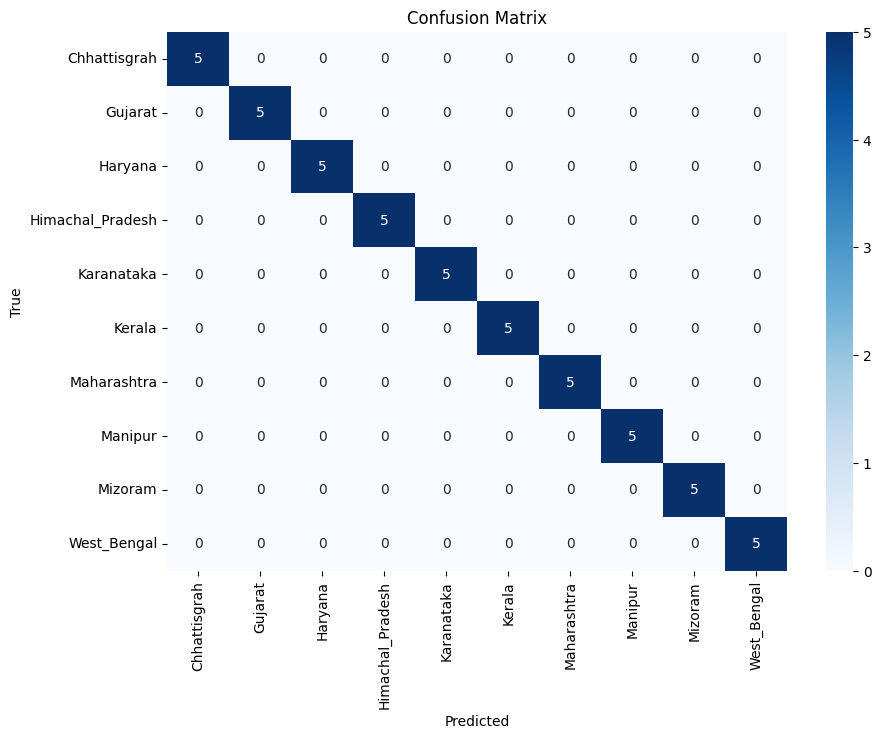

                  precision    recall  f1-score   support

    Chhattisgrah       1.00      1.00      1.00         5
         Gujarat       1.00      1.00      1.00         5
         Haryana       1.00      1.00      1.00         5
Himachal_Pradesh       1.00      1.00      1.00         5
      Karanataka       1.00      1.00      1.00         5
          Kerala       1.00      1.00      1.00         5
     Maharashtra       1.00      1.00      1.00         5
         Manipur       1.00      1.00      1.00         5
         Mizoram       1.00      1.00      1.00         5
     West_Bengal       1.00      1.00      1.00         5

        accuracy                           1.00        50
       macro avg       1.00      1.00      1.00        50
    weighted avg       1.00      1.00      1.00        50



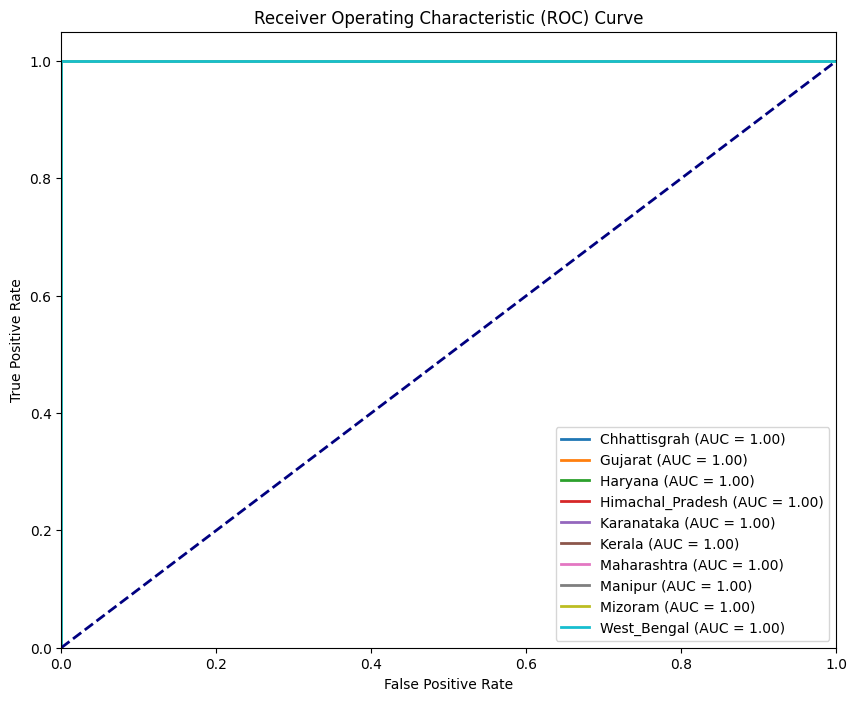

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Set up paths and parameters
test_dir = '/content/drive/MyDrive/fTest'
model_path = '/content/drive/MyDrive/Dataset/DenseNet121.h5'
image_size = (224, 224)  # Adjust to 224x224 based on the trained model

# Load your trained InceptionV3 model
model = load_model(model_path)

# Load and preprocess test images
test_images = []
test_labels = []  # This should be a list of true labels for each test image
class_labels = ['Chhattisgrah', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karanataka', 'Kerala',
                'Maharashtra', 'Manipur', 'Mizoram', 'West_Bengal']  # Define your classes here

# Create a mapping from class name to index
class_dict = {label.lower().replace(' ', '_'): idx for idx, label in enumerate(class_labels)}

# Manually load images and their labels
for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)

    # Skip directories
    if os.path.isdir(img_path):
        continue

    img = load_img(img_path, target_size=image_size)
    img = img_to_array(img)
    img = preprocess_input(img)
    test_images.append(img)

    # Extract the label from the filename
    # Assuming the filename is in the format <class>_<index>.jpeg
    label = img_name.rsplit('_', 1)[0].lower().replace(' ', '_')  # Extract class name part
    if label in class_dict:
        test_labels.append(class_dict[label])
    else:
        print(f"Warning: '{label}' extracted from '{img_name}' is not in class_labels")

# Convert to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Ensure that the number of test_labels matches the number of test_images
if len(test_images) != len(test_labels):
    print(f"Error: Mismatch in number of test images ({len(test_images)}) and labels ({len(test_labels)}).")
else:
    # Predict the classes of test images
    predictions = model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_labels

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    report = classification_report(y_true, y_pred, target_names=class_labels, zero_division=0)
    print(report)

    # Binarize the labels for multi-class ROC
    y_true_binarized = label_binarize(y_true, classes=range(len(class_labels)))

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(len(class_labels)):
        fpr, tpr, _ = roc_curve(y_true_binarized[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


2/2 [==============================] - 22s 4s/step
Accuracy: 100.00%


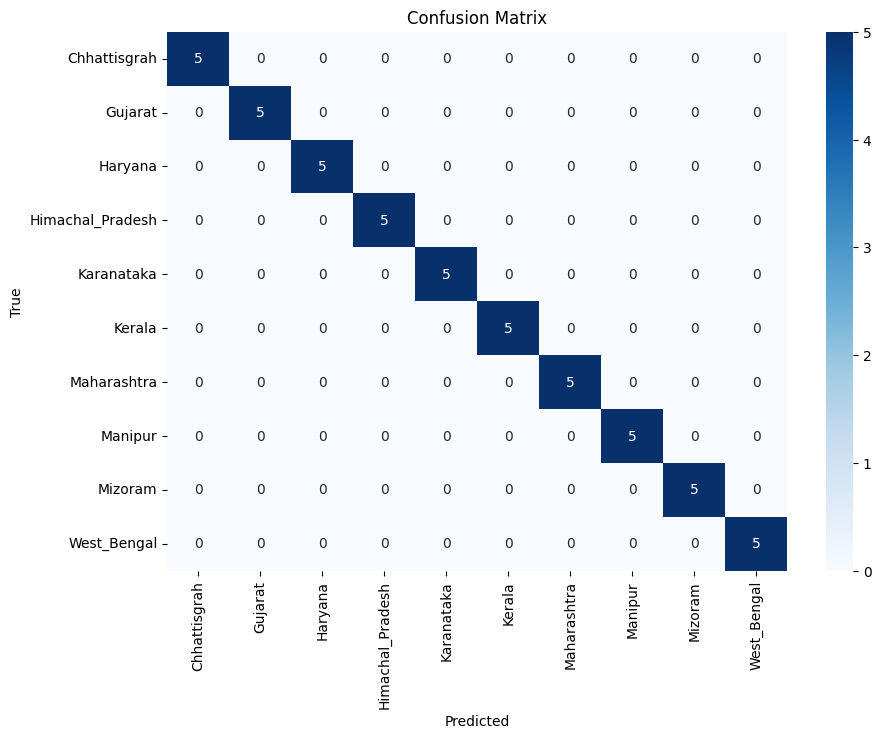

                  precision    recall  f1-score   support

    Chhattisgrah       1.00      1.00      1.00         5
         Gujarat       1.00      1.00      1.00         5
         Haryana       1.00      1.00      1.00         5
Himachal_Pradesh       1.00      1.00      1.00         5
      Karanataka       1.00      1.00      1.00         5
          Kerala       1.00      1.00      1.00         5
     Maharashtra       1.00      1.00      1.00         5
         Manipur       1.00      1.00      1.00         5
         Mizoram       1.00      1.00      1.00         5
     West_Bengal       1.00      1.00      1.00         5

        accuracy                           1.00        50
       macro avg       1.00      1.00      1.00        50
    weighted avg       1.00      1.00      1.00        50



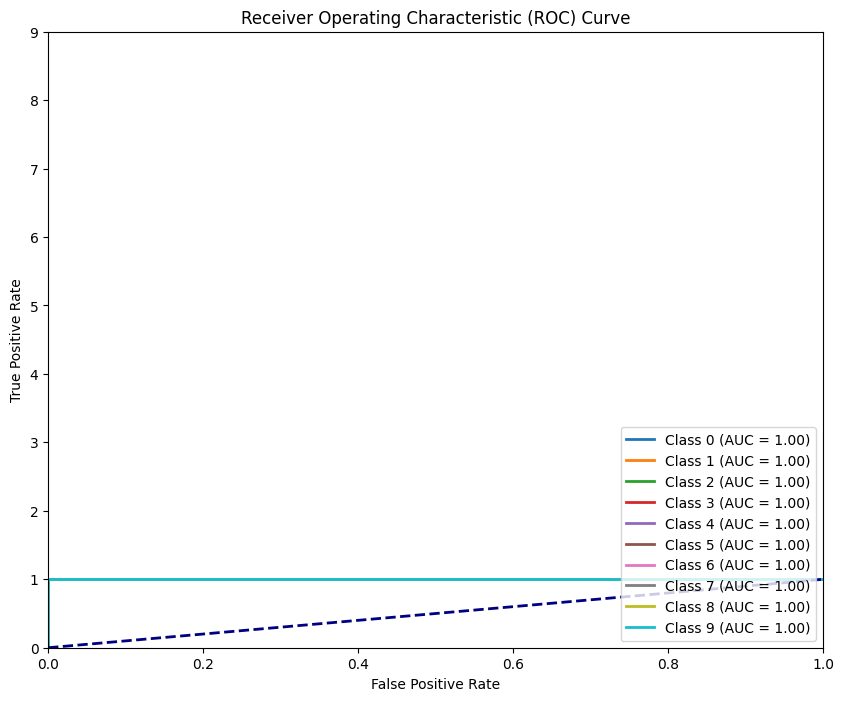

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Set up paths and parameters
test_dir = '/content/drive/MyDrive/fTest'
model_path = '/content/drive/MyDrive/Dataset/DenseNet121.h5'
image_size = (224, 224)  # Adjust to 224x224 based on the trained model

# Load your trained InceptionV3 model
model = load_model(model_path)

# Load and preprocess test images
test_images = []
test_labels = []  # This should be a list of true labels for each test image
class_labels = ['Chhattisgrah', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karanataka', 'Kerala',
                'Maharashtra', 'Manipur', 'Mizoram', 'West_Bengal']  # Define your classes here

# Create a mapping from class name to index
class_dict = {label.lower().replace(' ', '_'): idx for idx, label in enumerate(class_labels)}

# Manually load images and their labels
for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)

    # Skip directories
    if os.path.isdir(img_path):
        continue

    img = load_img(img_path, target_size=image_size)
    img = img_to_array(img)
    img = preprocess_input(img)
    test_images.append(img)

    # Extract the label from the filename
    # Assuming the filename is in the format <class>_<index>.jpeg
    label = img_name.rsplit('_', 1)[0].lower().replace(' ', '_')  # Extract class name part
    if label in class_dict:
        test_labels.append(class_dict[label])
    else:
        print(f"Warning: '{label}' extracted from '{img_name}' is not in class_labels")

# Convert to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Ensure that the number of test_labels matches the number of test_images
if len(test_images) != len(test_labels):
    print(f"Error: Mismatch in number of test images ({len(test_images)}) and labels ({len(test_labels)}).")
else:
    # Predict the classes of test images
    predictions = model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_labels

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    report = classification_report(y_true, y_pred, target_names=class_labels, zero_division=0)
    print(report)

    # Binarize the labels for multi-class ROC
    y_true_binarized = label_binarize(y_true, classes=range(len(class_labels)))

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(len(class_labels)):
        fpr, tpr, _ = roc_curve(y_true_binarized[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    # Set y-axis ticks to class indices
    plt.yticks(np.arange(len(class_labels)), np.arange(len(class_labels)))

    plt.show()


2/2 [==============================] - 10s 3s/step
Accuracy: 100.00%


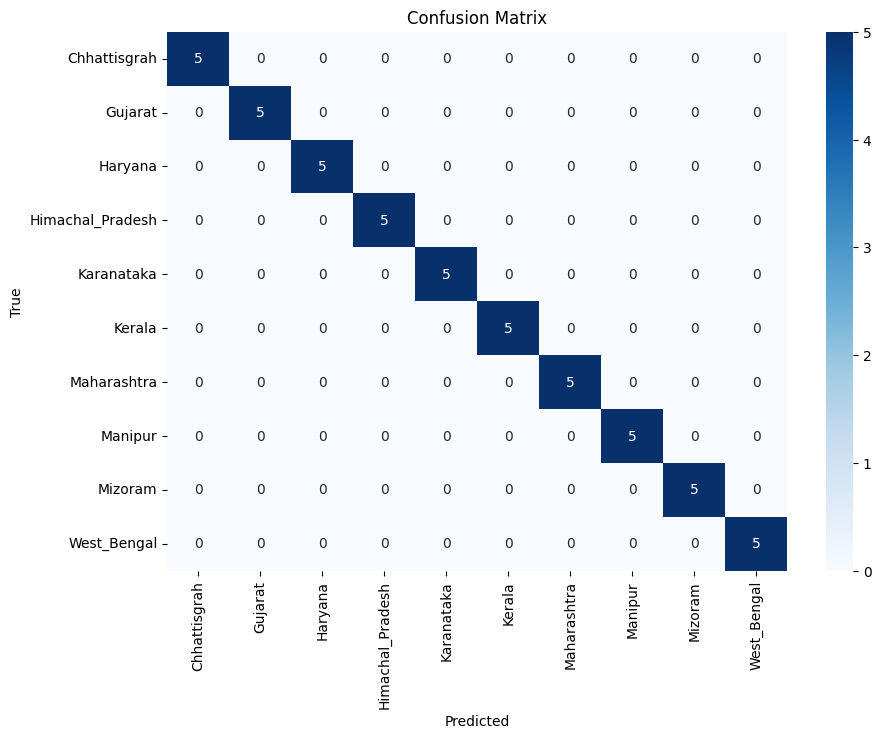

                  precision    recall  f1-score   support

    Chhattisgrah       1.00      1.00      1.00         5
         Gujarat       1.00      1.00      1.00         5
         Haryana       1.00      1.00      1.00         5
Himachal_Pradesh       1.00      1.00      1.00         5
      Karanataka       1.00      1.00      1.00         5
          Kerala       1.00      1.00      1.00         5
     Maharashtra       1.00      1.00      1.00         5
         Manipur       1.00      1.00      1.00         5
         Mizoram       1.00      1.00      1.00         5
     West_Bengal       1.00      1.00      1.00         5

        accuracy                           1.00        50
       macro avg       1.00      1.00      1.00        50
    weighted avg       1.00      1.00      1.00        50



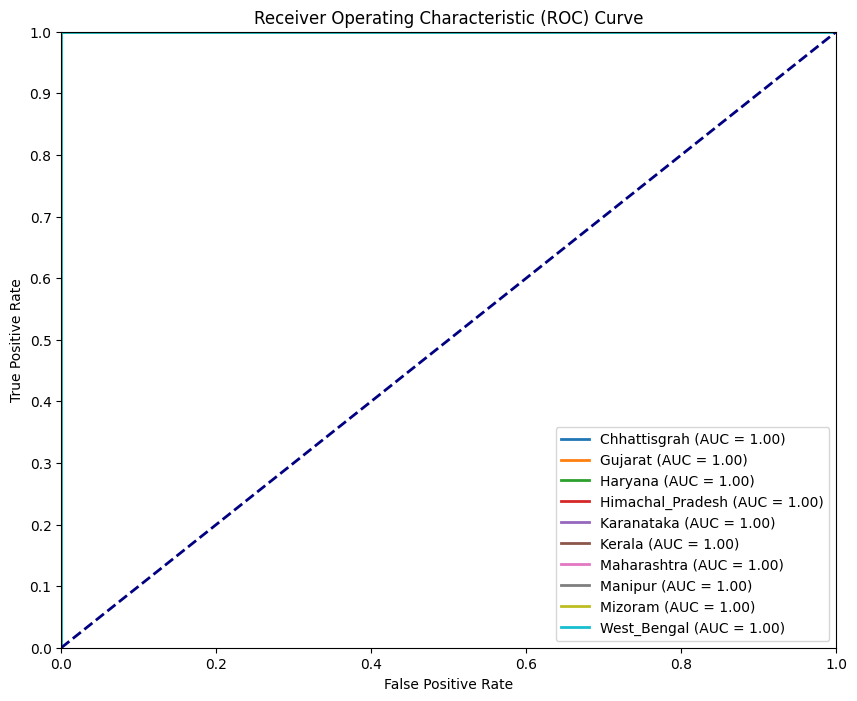

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Set up paths and parameters
test_dir = '/content/drive/MyDrive/fTest'
model_path = '/content/drive/MyDrive/Dataset/DenseNet121.h5'
image_size = (224, 224)  # Adjust to 224x224 based on the trained model

# Load your trained InceptionV3 model
model = load_model(model_path)

# Load and preprocess test images
test_images = []
test_labels = []  # This should be a list of true labels for each test image
class_labels = ['Chhattisgrah', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karanataka', 'Kerala',
                'Maharashtra', 'Manipur', 'Mizoram', 'West_Bengal']  # Define your classes here

# Create a mapping from class name to index
class_dict = {label.lower().replace(' ', '_'): idx for idx, label in enumerate(class_labels)}

# Manually load images and their labels
for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)

    # Skip directories
    if os.path.isdir(img_path):
        continue

    img = load_img(img_path, target_size=image_size)
    img = img_to_array(img)
    img = preprocess_input(img)
    test_images.append(img)

    # Extract the label from the filename
    # Assuming the filename is in the format <class>_<index>.jpeg
    label = img_name.rsplit('_', 1)[0].lower().replace(' ', '_')  # Extract class name part
    if label in class_dict:
        test_labels.append(class_dict[label])
    else:
        print(f"Warning: '{label}' extracted from '{img_name}' is not in class_labels")

# Convert to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Ensure that the number of test_labels matches the number of test_images
if len(test_images) != len(test_labels):
    print(f"Error: Mismatch in number of test images ({len(test_images)}) and labels ({len(test_labels)}).")
else:
    # Predict the classes of test images
    predictions = model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_labels

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    report = classification_report(y_true, y_pred, target_names=class_labels, zero_division=0)
    print(report)

    # Binarize the labels for multi-class ROC
    y_true_binarized = label_binarize(y_true, classes=range(len(class_labels)))

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(len(class_labels)):
        fpr, tpr, _ = roc_curve(y_true_binarized[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    # Set y-axis ticks to 0.1 increments
    plt.yticks(np.arange(0, 1.1, 0.1))

    plt.show()


2/2 [==============================] - 10s 2s/step


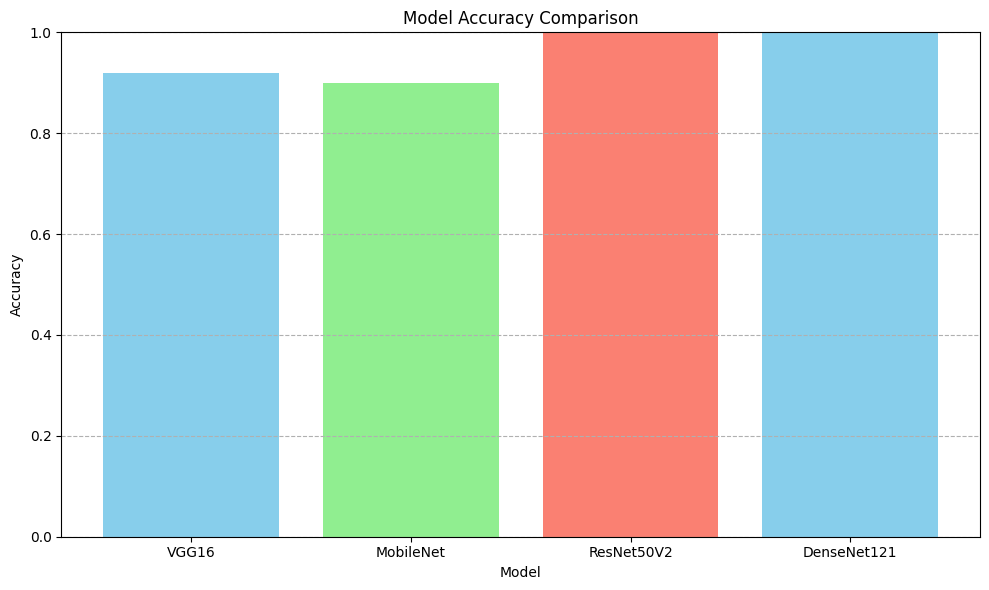

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import accuracy_score

# Set up paths and parameters
test_dir = '/content/drive/MyDrive/fTest'
image_size = (224, 224)  # Adjust to 224x224 based on the trained model

# Define the models and their paths
models = {
    'VGG16': '/content/drive/MyDrive/Dataset/VGG16.h5',
    'MobileNet': '/content/drive/MyDrive/Dataset/mobilenetv2_final.h5',
    'ResNet50V2': '/content/drive/MyDrive/Dataset/ResNet50V2.h5',
    'DenseNet121': '/content/drive/MyDrive/Dataset/DenseNet121.h5'
}

# Define class labels
class_labels = ['Chhattisgrah', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karanataka', 'Kerala',
                'Maharashtra', 'Manipur', 'Mizoram', 'West_Bengal']

# Create a mapping from class name to index
class_dict = {label.lower().replace(' ', '_'): idx for idx, label in enumerate(class_labels)}

# Load and preprocess test images
test_images = []
test_labels = []

for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    if os.path.isdir(img_path):
        continue

    img = load_img(img_path, target_size=image_size)
    img = img_to_array(img)
    img = preprocess_input(img)
    test_images.append(img)

    label = img_name.rsplit('_', 1)[0].lower().replace(' ', '_')
    if label in class_dict:
        test_labels.append(class_dict[label])
    else:
        print(f"Warning: '{label}' extracted from '{img_name}' is not in class_labels")

# Convert to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Collect accuracy data for each model
model_accuracies = []

for model_name, model_path in models.items():
    model = load_model(model_path)
    predictions = model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_labels

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(y_true, y_pred)
    model_accuracies.append((model_name, overall_accuracy))

# Create a DataFrame for visualization
data = {
    'Model': [ma[0] for ma in model_accuracies],
    'Accuracy': [ma[1] for ma in model_accuracies]
}

df = pd.DataFrame(data)

# Plot the bar graph for accuracy
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Accuracy'], color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 to represent percentages
plt.grid(axis='y', linestyle='--')

# Save the plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Dataset/model_accuracy_comparison1.png')
plt.show()

2/2 [==============================] - 10s 2s/step


2/2 [==============================] - 10s 4s/step


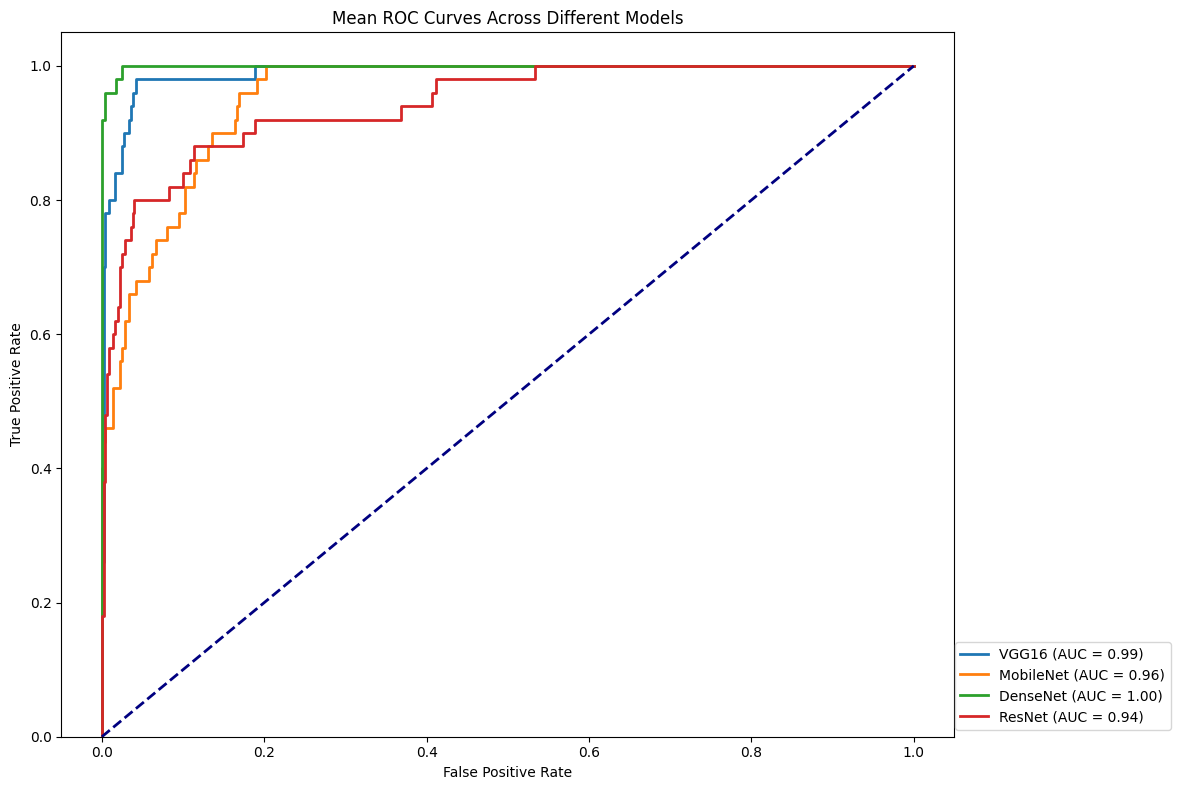

AUC for VGG16: 0.99
AUC for MobileNet: 0.96
AUC for DenseNet: 1.00
AUC for ResNet: 0.94


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.densenet import preprocess_input

# Define the classes
classes = ['Chhattisgrah', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karanataka', 'Kerala',
                'Maharashtra', 'Manipur', 'Mizoram', 'West_Bengal']
class_dict = {class_name.lower().replace(' ', '_'): idx for idx, class_name in enumerate(classes)}

# Define the path to the test dataset
test_data_dir = '/content/drive/MyDrive/fTest'

# Load and preprocess the test images
image_size = (224, 224)  # Adjust to your model input size
test_images = []
test_labels = []

# Define valid image extensions
valid_image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

for img_name in os.listdir(test_data_dir):
    img_path = os.path.join(test_data_dir, img_name)

    # Check if the file is an image
    if os.path.isfile(img_path) and any(img_name.lower().endswith(ext) for ext in valid_image_extensions):
        img = load_img(img_path, target_size=image_size)
        img = img_to_array(img)
        img = preprocess_input(img)
        test_images.append(img)

        # Extract the label from the filename
        # Assuming the filename is in the format <class>_<index>.jpeg
        label = img_name.rsplit('_', 1)[0].lower().replace(' ', '_')  # Extract class name part
        if label in class_dict:
            test_labels.append(class_dict[label])
        else:
            print(f"Warning: '{label}' extracted from '{img_name}' is not in class_labels")

# Convert to numpy arrays
X_test = np.array(test_images)
y_test = np.array(test_labels)

# Convert labels to one-hot encoding
y_test = label_binarize(y_test, classes=range(len(classes)))

# Load the pre-trained models
model_paths = {
    'VGG16': '/content/drive/MyDrive/Dataset/VGG16.h5',
    'MobileNet': '/content/drive/MyDrive/Dataset/mobilenetv2_final.h5',
    'DenseNet': '/content/drive/MyDrive/Dataset/DenseNet121.h5',
    'ResNet': '/content/drive/MyDrive/Dataset/ResNet50V2.h5'
}

# Initialize variables to store ROC and AUC values for each model
roc_values = {}
auc_values = {}

# Plot all ROC curves in one graph
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability

# Iterate over each model to compute ROC and AUC
for model_name, model_path in model_paths.items():
    model = load_model(model_path)

    # Predict probabilities
    y_score = model.predict(X_test)

    # Initialize variables to store ROC and AUC values for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(classes)):
        # Compute ROC curve and AUC for each class
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Store ROC and AUC values
    roc_values[model_name] = (fpr, tpr)
    auc_values[model_name] = roc_auc

    # Plot ROC Curve for the current model
    plt.plot(fpr["micro"], tpr["micro"], lw=2, label=f'{model_name} (AUC = {roc_auc["micro"]:.2f})')

# Plot the reference line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot limits and labels
plt.xlim([-0.05, 1.05])  # Extend x-axis slightly beyond [0, 1] for better appearance
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curves Across Different Models')
plt.legend(loc="lower right", bbox_to_anchor=(1.25, 0))

# Print AUC values
plt.tight_layout()
plt.show()

# Print AUC values outside the plot
for model_name, roc_auc in auc_values.items():
    print(f'AUC for {model_name}: {roc_auc["micro"]:.2f}')

2/2 [==============================] - 9s 2s/step


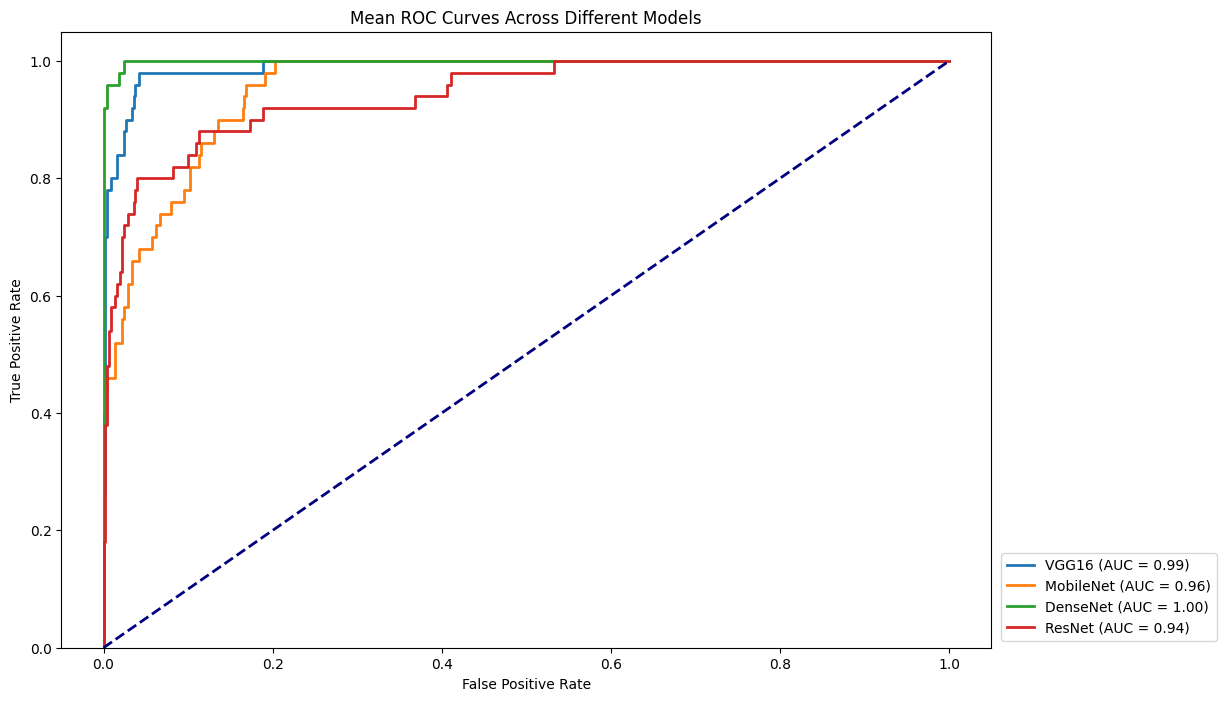

<Figure size 640x480 with 0 Axes>

AUC for VGG16: 0.99
AUC for MobileNet: 0.96
AUC for DenseNet: 1.00
AUC for ResNet: 0.94


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.densenet import preprocess_input

# Define the classes
classes = ['Chhattisgrah', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karanataka', 'Kerala',
                'Maharashtra', 'Manipur', 'Mizoram', 'West_Bengal']
class_dict = {class_name.lower().replace(' ', '_'): idx for idx, class_name in enumerate(classes)}

# Define the path to the test dataset
test_data_dir = '/content/drive/MyDrive/fTest'

# Load and preprocess the test images
image_size = (224, 224)  # Adjust to your model input size
test_images = []
test_labels = []

# Define valid image extensions
valid_image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

for img_name in os.listdir(test_data_dir):
    img_path = os.path.join(test_data_dir, img_name)

    # Check if the file is an image
    if os.path.isfile(img_path) and any(img_name.lower().endswith(ext) for ext in valid_image_extensions):
        img = load_img(img_path, target_size=image_size)
        img = img_to_array(img)
        img = preprocess_input(img)
        test_images.append(img)

        # Extract the label from the filename
        # Assuming the filename is in the format <class>_<index>.jpeg
        label = img_name.rsplit('_', 1)[0].lower().replace(' ', '_')  # Extract class name part
        if label in class_dict:
            test_labels.append(class_dict[label])
        else:
            print(f"Warning: '{label}' extracted from '{img_name}' is not in class_labels")

# Convert to numpy arrays
X_test = np.array(test_images)
y_test = np.array(test_labels)

# Convert labels to one-hot encoding
y_test = label_binarize(y_test, classes=range(len(classes)))

# Load the pre-trained models
model_paths = {
    'VGG16': '/content/drive/MyDrive/Dataset/VGG16.h5',
    'MobileNet': '/content/drive/MyDrive/Dataset/mobilenetv2_final.h5',
    'DenseNet': '/content/drive/MyDrive/Dataset/DenseNet121.h5',
    'ResNet': '/content/drive/MyDrive/Dataset/ResNet50V2.h5'
}

# Initialize variables to store ROC and AUC values for each model
roc_values = {}
auc_values = {}

# Plot all ROC curves in one graph
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability

# Iterate over each model to compute ROC and AUC
for model_name, model_path in model_paths.items():
    model = load_model(model_path)

    # Predict probabilities
    y_score = model.predict(X_test)

    # Initialize variables to store ROC and AUC values for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(classes)):
        # Compute ROC curve and AUC for each class
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Store ROC and AUC values
    roc_values[model_name] = (fpr, tpr)
    auc_values[model_name] = roc_auc

    # Plot ROC Curve for the current model
    plt.plot(fpr["micro"], tpr["micro"], lw=2, label=f'{model_name} (AUC = {roc_auc["micro"]:.2f})')

# Plot the reference line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot limits and labels
plt.xlim([-0.05, 1.05])  # Extend x-axis slightly beyond [0, 1] for better appearance
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curves Across Different Models')
plt.legend(loc="lower right", bbox_to_anchor=(1.25, 0))

# Save the plot
plt.savefig('/content/drive/MyDrive/Dataset/Roc_Graph.png')
plt.show()

# Print AUC values
plt.tight_layout()
plt.show()

# Print AUC values outside the plot
for model_name, roc_auc in auc_values.items():
    print(f'AUC for {model_name}: {roc_auc["micro"]:.2f}')


